In [1]:
"""
1. Import Global Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)

In [2]:
"""
2. Linear Regression
Source: Week 6 Notebook
"""

import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

np.set_printoptions(precision=4, suppress=True)


/Users/davidlarance/anaconda3/envs/ipykernal_py2/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [28]:
"""
3. Load Subsetted that was created in EDA notebook and target error from raw zillow file
Note to Sullivan: I had to reverse the slashes from back to forward to work
"""

# Load the pre-subsetted data
train_data = pd.read_csv('../Data/subsetted/training_data_processed.csv', sep=',', engine='python')

# Load the label data
train_target = pd.read_csv('../Data/subsetted/training_labels_processed.csv', sep=',', engine='python')
train_target_bin = pd.read_csv('../Data/subsetted/training_labels_bin_processed.csv', sep=',', engine='python')

In [7]:
# 3. Check the data

# 3.1 Data shape
# Check the shape of the data
print("Train data shape:", train_data.shape)

# Check the shape of the targets
print("Label data shape:", train_target.shape)
print("Binarized label data shape:", train_target_bin.shape)

print train_data.describe
print train_target.describe
print train_target_bin.describe


('Train data shape:', (167854, 39))
('Label data shape:', (167853, 1))
('Binarized label data shape:', (167853, 1))
<bound method DataFrame.describe of           parcelid  airconditioningtypeid  bathroomcnt  bedroomcnt  \
0       11016594.0                    1.0          2.0         3.0   
1       14366692.0                   -9.0          3.5         4.0   
2       12098116.0                    1.0          3.0         2.0   
3       12643413.0                    1.0          2.0         2.0   
4       14432541.0                   -9.0          2.5         4.0   
5       11509835.0                    1.0          4.0         4.0   
6       12286022.0                   -9.0          1.0         2.0   
7       17177301.0                   -9.0          2.5         3.0   
8       14739064.0                   -9.0          1.0         2.0   
9       14677559.0                   -9.0          2.0         2.0   
10      10854446.0                   -9.0          2.0         2.0   
11      

In [29]:
# 4. Prep the data

# 4.1 Remove non int or float columns - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.select_dtypes(['float64','int64'])

# 4.2 Remove columns from the data matrix that contain Nan values - Moved to Preprocessing_Clean Notebook
# train_data_2016 = train_data_2016.dropna(axis=1, how='any')
# If we'd rather just remove rows with a Nan, we'd need to change the axis to 0


print 'data shape: ', train_data.shape
print 'labels shape: ', train_target.shape
train_data = train_data.drop([0,0])

# 4.3 Set the X, Y, and Y(binarized labels) variables
X, Y, Yb = np.asarray(train_data), np.asarray(train_target), np.asarray(train_target_bin)
Y, Yb = Y.reshape((167853,)), Yb.reshape((167853,))

print 'data shape: ', X.shape
print 'labels shape: ', Y.shape

# 4.4 Shuffle the variables
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y, Yb = X[shuffle], Y[shuffle], Yb[shuffle]

print 'data shape: ', X.shape
print 'target shape: ', Y.shape
print 'target (binarized) shape: ', Yb.shape

# # 4.5 Create different arrays for training and testing data.
train_data, train_labels, train_labels_bin = X[:130000], Y[:130000], Yb[:130000]
mini_train_data, mini_train_labels, mini_train_labels_bin = X[:1000], Y[:1000], Yb[:1000]
test_data, test_labels, test_labels_bin = X[130000:], Y[130000:], Yb[130000:]

data shape:  (167854, 39)
labels shape:  (167853, 1)
data shape:  (167853, 39)
labels shape:  (167853,)
data shape:  (167853, 39)
target shape:  (167853,)
target (binarized) shape:  (167853,)


In [30]:
# 5. Create, fit the Linear Regression classifier

# 5.1 Create and fit
linr =  LinearRegression()
linr.fit(mini_train_data, mini_train_labels)

# 5.2 Print the resulting model
print 'Estimated intercept:', linr.intercept_

print 'Estimated coefficients:', linr.coef_


Estimated intercept: -19.92531494298957
Estimated coefficients: [-0.     -0.0005 -0.0242  0.0086 -0.002   0.0364 -0.      0.      0.0007
 -0.0515 -0.025  -0.0432  0.     -0.0028 -0.      0.     -0.     -0.0044
  0.0005 -0.     -0.     -0.      0.0005  0.      0.      0.      0.0047
  0.0015 -0.0135  0.      0.0002  0.0122 -0.      0.      0.0099 -0.
  0.      0.0573 -0.0308]


/Users/davidlarance/anaconda3/envs/ipykernal_py2/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(0.5,1,u'Error vs. Predicted Error')

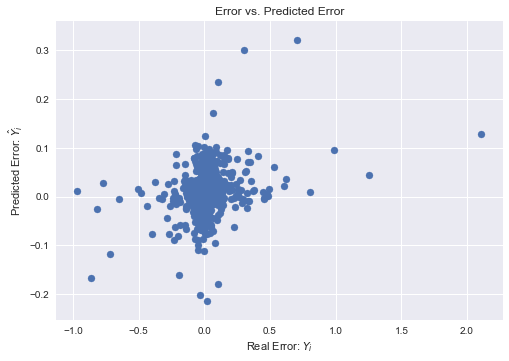

In [31]:
# 6. Test the accuracy of the classifier

plt.scatter(mini_train_labels, linr.predict(mini_train_data))
plt.xlabel("Real Error: $Y_i$")
plt.ylabel("Predicted Error: $\hat{Y}_i$")
plt.title("Error vs. Predicted Error")
           
        